## Imbalanced Dataset Handling using under & over sampling techniques:
For imbalanced datasets Accuracy measurement gives false results, due to biased towards majority class.
There are 2 ways to treat imbalanced datasets
1. Under sampling
   i.   Random Under Sampling
   ii.  TomekLinks Sampling
   iii. Cluster Centroid Sampling
2. Over sampling
   i.   Random Over Sampling
   ii.  SMOTE - Sysnthetic Minority Over sampling technique

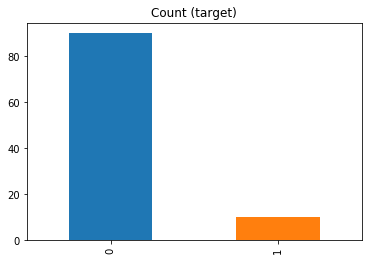

(100, 4)
(100,)
          0         1         2         3  target
0  1.815282 -1.356527 -0.684868  1.144160       0
1  1.616326 -1.947283  0.053980  0.949082       0
2  2.834230 -2.985269 -0.848607  1.449599       0
3  2.063402 -0.351138 -1.860466  1.406814       0
4  1.254410 -0.568141 -0.454025  0.985794       0


In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

#Making imbalanced dataset using make_Classification
x, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=4, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(x)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')
plt.show()
print(x.shape)
print(y.shape)
print(df.head())

In [138]:
df['target'].value_counts()

0    90
1    10
Name: target, dtype: int64

## RandomUnderSampler: 
Random Under Sampling is technique to convert imbalanced dataset into to balanced dataset by removing majority class datapoints.

(20,)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
1    10
0    10
Name: target, dtype: int64


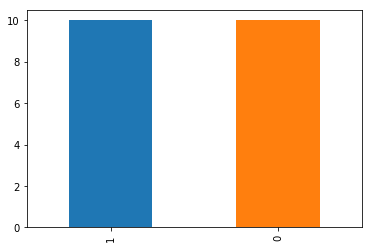

In [139]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(return_indices=True)
xrus,yrus,ids=rus.fit_sample(x,y)
print(yrus.shape)
print(yrus)
df1=pd.DataFrame(xrus)
df1['target']=yrus
print(df1['target'].value_counts())
df1['target'].value_counts().plot(kind='bar')
plt.show()

## TomekLinks: 
TomekLinks is a under sampling technique to conver imbalanced dataset into to balanced dataset by removing majority class datapoints based on TomekLinks.
Tomek links are pairs of very close instances, but of opposite classes.

(100, 4)
(100,)
0    90
1    10
Name: target, dtype: int64


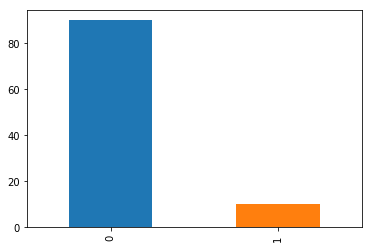

In [140]:
from imblearn.under_sampling import TomekLinks
Tomek=TomekLinks(ratio='majority')
xtmk,ytmk=Tomek.fit_sample(x,y)
print(xtmk.shape)
print(ytmk.shape)
df2=pd.DataFrame(xtmk)
df2['target']=ytmk
print(df2['target'].value_counts())
df2['target'].value_counts().plot(kind='bar')
plt.show()

## Cluster Centroids: 
ClusterCentroids is a under sampling technique to conver imbalanced dataset into to balanced dataset by removing majority class datapoints based on cluster centroids generated using cl;ustering.

(20, 4)
(20,)
1    10
0    10
Name: target, dtype: int64


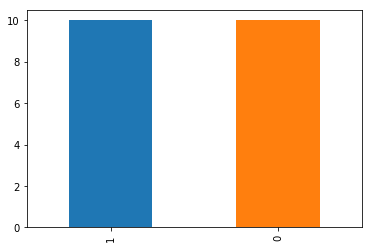

In [141]:
from imblearn.under_sampling import ClusterCentroids
CC=ClusterCentroids(ratio={0:10})
xCC,yCC=CC.fit_sample(x,y)
print(xCC.shape)
print(yCC.shape)
df3=pd.DataFrame(xCC)
df3['target']=yCC
print(df3['target'].value_counts())
df1['target'].value_counts().plot(kind='bar')
plt.show()


## RandomOvererSampler: 
Random Oveer Sampling is technique to convert imbalanced dataset into to balanced dataset by adding random minority class datapoints.

(180, 4)
(180,)
1    90
0    90
Name: target, dtype: int64


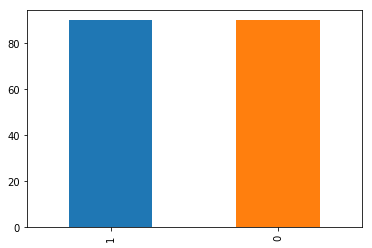

In [142]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
xros,yros=ros.fit_sample(x,y)
print(xros.shape)
print(yros.shape)
df4=pd.DataFrame(xros)
df4['target']=yros
print(df4['target'].value_counts())
df4['target'].value_counts().plot(kind='bar')
plt.show()

## SMOTE: 
SMOTE is technique used to convert imbalanced dataset into to balanced dataset using synthetic technique.
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

(180, 4)
(180,)
1    90
0    90
Name: target, dtype: int64


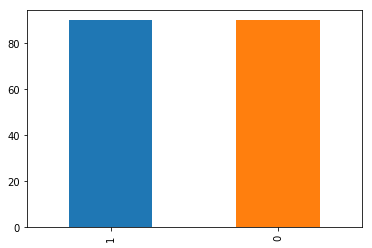

In [143]:
from imblearn.over_sampling import SMOTE
smte=SMOTE(ratio='minority')
xsmte,ysmte=smte.fit_sample(x,y)
print(xsmte.shape)
print(ysmte.shape)
df5=pd.DataFrame(xsmte)
df5['target']=ysmte
print(df5['target'].value_counts())
df5['target'].value_counts().plot(kind='bar')
plt.show()